In [26]:
import pandas as pd
import ipcalc
import parse_functions as pf
import janitor
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Vorbereitung: Einlesen der Daten
- Schwierigkeit: Größe des Datensatzes: 10.365.152 Daten (über 10 Milionen)
- keine eindeutiges Trennzeichen in den Daten vorhanden
- kein von Pandas vorgefertigter Import für Log Dateien

In [12]:
# Source: https://mmas.github.io/read-apache-access-log-pandas
access_log = pd.read_csv(
    'data/access.log',
    sep=r'\s(?=(?:[^"]*"[^"]*")*[^"]*$)(?![^\[]*\]\s)',
    engine='python',
    na_values='-',
    header=None,
    usecols=[0, 3, 4, 5, 6, 7, 8],
    names=['ip', 'time', 'request', 'status', 'size', 'referer', 'user_agent'],
    converters={'time': pf.parse_datetime,
                'request': pf.parse_str,
                'status': int,
                'size': int,
                'referer': pf.parse_str,
                'user_agent': pf.parse_str},
    on_bad_lines='warn')

access_log.head()


KeyboardInterrupt: 

## Umwandlung in CSV Datei
- Damit nicht jedes Mal Daten neu über das Log eingelesen werden müssen!
- CSV Datei erstellen und für erneutes einlesen nutzbar (geht schneller)

In [ ]:
#Daten in einer CSV Datei speicher
filename = "data/acces_log.csv"
access_log.to_csv(filename)

In [5]:
# Daten aus einer CSV Date einladen
filename = "data/acces_log.csv"
access_log_csv = pd.read_csv(filename)
len(access_log_csv)


In [24]:
# Konvertieren des Datums von String zu Datetime!
access_log_csv["time"] = pd.to_datetime(access_log_csv["time"], dayfirst=True, infer_datetime_format=True)

C:\Users\tomse\AppData\Local\Temp\ipykernel_22024\2960024195.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  access_log_csv["time"] = pd.to_datetime(access_log_csv["time"], dayfirst=True, infer_datetime_format=True)


In [16]:
access_log = access_log_csv

In [6]:
#Erzeuge eine Kopie der Daten als "Backup"
access_log_backup = access_log.copy()
len(access_log_backup)

10365152

In [100]:
access_log = access_log_backup.copy()

# Aufgabe 1: Beliebtestes Produkt

> Analysieren Sie welche Produkte beliebt sind. Entwickeln Sie dazu eine Definition eines beliebten Produktes. Stellen Sie die Ergebnisse anschaulich da.

## Definition

> **Unsere Definition:**  
  Das Produkt mit dein meisten Aufrufen auf dem Webserver

## Ergebnis


In [8]:
most_viewed_products = access_log.loc[access_log['request'].str.contains(r'^GET /product/\d+', na=False)].value_counts(access_log['request'])
print(most_viewed_products[0], most_viewed_products.keys()[0])

453 GET /product/33968/64756/%DA%AF%D9%88%D8%B4%DB%8C-%D9%85%D9%88%D8%A8%D8%A7%DB%8C%D9%84-%D8%B3%D8%A7%D9%85%D8%B3%D9%88%D9%86%DA%AF-%D9%85%D8%AF%D9%84-Galaxy-J6-Plus-%282018%29-Dual-32GB-%28J610F-DS%29 HTTP/1.1


# Aufgabe 2

> Untersuchen Sie den Datensatz auf weitere Auffälligkeiten.


## Basisinformationen durch Panda Befehle
- Pandas bietet bereits vordefinierte Befehle um einfache Informationen über die Daten zu ermitteln
- Ein Start mit den Befehlen hilft dabei die Daten zu erkunden
- Speziell bei numerrischen Daten erhält man bereits eine Reihe an spannenden statistischen Informationen, aber auch Daten wie eine solche Log Datei, lohnt es sich beide Befehle kurz anzugucken

### Befehl .info()
- Übersicht über die Spalten
- Angabe zu den Datentypen der Spalten

In [23]:
access_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10365152 entries, 0 to 10365151
Data columns (total 8 columns):
 #   Column      Dtype                    
---  ------      -----                    
 0   Unnamed: 0  int64                    
 1   ip          object                   
 2   time        datetime64[ns, UTC+03:30]
 3   request     object                   
 4   status      int64                    
 5   size        int64                    
 6   referer     object                   
 7   user_agent  object                   
dtypes: datetime64[ns, UTC+03:30](1), int64(3), object(4)
memory usage: 632.6+ MB


### Befehl .describe()
- Anzahl der Einträge
- wie viele einzigartige Einträge
- höchste Zahl
- durchschnitt
- einiges mehr

--> Statistische Basisinformationen <br>
--> Parameter ```include all``` notwendig, dass auch nicht numerische Daten aufgeführt werden



In [ ]:
access_log.describe(include = 'all')

,ip,time,request,status,size,referer,user_agent,day,time_of_day,hour,minute
count,10365152,10365152,10365146,1.036515e+07,1.036515e+07,8718773,10350668,10365152.0,10365152,10365152.0,10365152.0
unique,258606,NaN,894210,NaN,NaN,103236,28342,NaN,1,NaN,NaN
top,66.249.66.194,NaN,GET /settings/logo HTTP/1.1,NaN,NaN,https://www.zanbil.ir/,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,NaN,03:57:11,NaN,NaN
freq,353483,NaN,352037,NaN,NaN,494757,746572,NaN,10365152,NaN,NaN
mean,NaN,2019-01-24 13:02:56.248167680+03:30,NaN,2.101419e+02,1.243311e+04,NaN,NaN,22.0,NaN,3.0,57.0
min,NaN,2019-01-22 03:56:14+03:30,NaN,2.000000e+02,0.000000e+00,NaN,NaN,22.0,NaN,3.0,57.0
25%,NaN,2019-01-23 09:32:56+03:30,NaN,2.000000e+02,2.027000e+03,NaN,NaN,22.0,NaN,3.0,57.0
50%,NaN,2019-01-24 12:09:06+03:30,NaN,2.000000e+02,4.120000e+03,NaN,NaN,22.0,NaN,3.0,57.0
75%,NaN,2019-01-25 20:22:33+03:30,NaN,2.000000e+02,1.155100e+04,NaN,NaN,22.0,NaN,3.0,57.0
max,NaN,2019-01-26 20:29:13+03:30,NaN,5.040000e+02,1.249490e+06,NaN,NaN,22.0,NaN,3.0,57.0


In [27]:
access_log.head(5)

,Unnamed: 0,ip,time,request,status,size,referer,user_agent,test
0,0,54.36.149.41,2019-01-22 03:56:14+03:30,GET /filter/27|13%20%D9%85%DA%AF%D8%A7%D9%BE%D...,200,30577,NaN,Mozilla/5.0 (compatible; AhrefsBot/6.1; +http:...,1
1,1,31.56.96.51,2019-01-22 03:56:16+03:30,GET /image/60844/productModel/200x200 HTTP/1.1,200,5667,https://www.zanbil.ir/m/filter/b113,Mozilla/5.0 (Linux; Android 6.0; ALE-L21 Build...,1
2,2,31.56.96.51,2019-01-22 03:56:16+03:30,GET /image/61474/productModel/200x200 HTTP/1.1,200,5379,https://www.zanbil.ir/m/filter/b113,Mozilla/5.0 (Linux; Android 6.0; ALE-L21 Build...,1
3,3,40.77.167.129,2019-01-22 03:56:17+03:30,GET /image/14925/productModel/100x100 HTTP/1.1,200,1696,NaN,Mozilla/5.0 (compatible; bingbot/2.0; +http://...,1
4,4,91.99.72.15,2019-01-22 03:56:17+03:30,GET /product/31893/62100/%D8%B3%D8%B4%D9%88%D8...,200,41483,NaN,Mozilla/5.0 (Windows NT 6.2; Win64; x64; rv:16...,1


In [30]:
access_log[10000:10200]

,Unnamed: 0,ip,time,request,status,size,referer,user_agent,test,day,time_of_day,hour,minute
10000,10000,37.129.232.66,2019-01-22 04:36:57+03:30,GET /static/images/guarantees/support.png HTTP...,200,6454,https://www.zanbil.ir/m/filter/b785,Mozilla/5.0 (Linux; Android 7.0; RNE-L21 Build...,1,2019-01-22,04:36:57,4,36
10001,10001,37.129.232.66,2019-01-22 04:36:57+03:30,GET /static/images/guarantees/fastDelivery.png...,200,7713,https://www.zanbil.ir/m/filter/b785,Mozilla/5.0 (Linux; Android 7.0; RNE-L21 Build...,1,2019-01-22,04:36:57,4,36
10002,10002,37.129.232.66,2019-01-22 04:36:57+03:30,GET /static/css/font/wyekan/font.woff HTTP/1.1,200,28536,https://www.zanbil.ir/m/filter/b785,Mozilla/5.0 (Linux; Android 7.0; RNE-L21 Build...,1,2019-01-22,04:36:57,4,36
10003,10003,66.249.66.194,2019-01-22 04:36:57+03:30,GET /m/filter/p11905%2Cb573%2Cb546%2Cb609%2Cst...,302,0,NaN,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,1,2019-01-22,04:36:57,4,36
10004,10004,93.110.220.181,2019-01-22 04:36:57+03:30,GET /product/28204/56978/%D9%87%D9%88%D8%AF-%D...,200,43481,"https://www.zanbil.ir/filter/p2597,rf1660000,r...",Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,1,2019-01-22,04:36:57,4,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10195,10195,85.239.198.13,2019-01-22 04:37:40+03:30,GET /image/33888?name=model-b2048u-1-.jpg&wh=2...,200,3975,NaN,Dalvik/1.6.0 (Linux; U; Android 4.2.2; MediaPa...,1,2019-01-22,04:37:40,4,37
10196,10196,157.55.39.245,2019-01-22 04:37:41+03:30,GET /product/17516?model=33959 HTTP/1.1,200,41064,NaN,Mozilla/5.0 (compatible; bingbot/2.0; +http://...,1,2019-01-22,04:37:40,4,37
10197,10197,91.99.72.15,2019-01-22 04:37:41+03:30,GET /product/8248/10330/%DB%8C%D8%AE%DA%86%D8%...,200,41823,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,1,2019-01-22,04:37:41,4,37
10198,10198,23.101.169.3,2019-01-22 04:37:41+03:30,GET /static/images/icons/btn-search.png HTTP/1.1,200,393,https://www.zanbil.ir/product/31011/%DA%AF%D9%...,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,1,2019-01-22,04:37:41,4,37


ToDo: prüfen ob wir das drin haben wollen / raus nehmen möchten? -> wäre nur ne kleine Hilfestellung zum Zugriff auf Attribute
## Grundlage Zugriff auf Attribute:

- Aufruf möglich durch ``acces_log.ip`` oder ``auch acces_log["ip"]``

In [9]:
# IP-Adressen mit den meisten Aufrufen 
access_log.value_counts("ip")

ip
66.249.66.194      353483
66.249.66.91       314522
151.239.241.163     92475
66.249.66.92        88332
91.99.30.32         45979
                    ...  
5.217.114.109           1
2.185.112.228           1
37.44.58.168            1
5.119.191.23            1
5.52.183.148            1
Name: count, Length: 258606, dtype: int64

In [25]:
# Vorbereitendes Ausprobieren erkunden --> entfernen wenn es nichts sinvolles mehr ist
print(type(access_log.time[0]))
print("---------------")
print(access_log.time.value_counts())
print("---------------")
print(access_log.time[0])
print(access_log.time[0].date())
print(access_log.time[0].time())
print(access_log.time[0].hour)
print(access_log.time[0].minute)

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
---------------
time
2019-01-26 19:07:39+03:30    368
2019-01-26 19:05:58+03:30    323
2019-01-26 16:06:25+03:30    313
2019-01-26 12:39:19+03:30    309
2019-01-26 09:59:47+03:30    298
                            ... 
2019-01-25 03:43:42+03:30      1
2019-01-23 05:17:43+03:30      1
2019-01-24 04:39:17+03:30      1
2019-01-25 03:44:06+03:30      1
2019-01-22 03:56:14+03:30      1
Name: count, Length: 400109, dtype: int64
---------------
2019-01-22 03:56:14+03:30
2019-01-22
03:56:14
3
56


In [48]:
# For Schleife zum erstellen der neuen Attribute Tag und Zeit Stunde und Minute
# Das kann ggf. auch schöner gemacht werden. Dauert auf jeden Fall seine Zeit!

#erstellt jeweilige Spalten

"""
i = 0

for timestamp in access_log.time:
    access_log["day"][i] = timestamp.date()
    access_log["time_of_day"][i] = timestamp.time() #ToDo: hier ggf. vorher time zu timestamp machen --> dann 
    access_log["hour"][i] = timestamp.hour
    access_log["minute"][i] = timestamp.minute
    i = i+1

    #print(timestamp, i) """

'\ni = 0\n\nfor timestamp in access_log.time:\n    access_log["day"][i] = timestamp.date()\n    access_log["time_of_day"][i] = timestamp.time() #ToDo: hier ggf. vorher time zu timestamp machen --> dann \n    access_log["hour"][i] = timestamp.hour\n    access_log["minute"][i] = timestamp.minute\n    i = i+1\n\n    #print(timestamp, i) '

In [52]:
# alternative Möglichkeit Spalten festzulegen (get schneller)
days = []
time_of_day = []
hour = []
minute = []


for timestamp in access_log.time:
    days.append(timestamp.date())
    time_of_day.append(timestamp.time()) #ToDo: hier ggf. vorher time zu timestamp machen --> dann 
    hour.append(timestamp.hour)
    minute.append(timestamp.minute)

access_log["day"] = days
access_log["time_of_day"] = time_of_day
access_log["hour"] = hour
access_log["minute"] = minute

In [54]:
access_log.head()

,Unnamed: 0,ip,time,request,status,size,referer,user_agent,test,day,time_of_day,hour,minute
0,0,54.36.149.41,2019-01-22 03:56:14+03:30,GET /filter/27|13%20%D9%85%DA%AF%D8%A7%D9%BE%D...,200,30577,NaN,Mozilla/5.0 (compatible; AhrefsBot/6.1; +http:...,1,2019-01-22,03:56:14,3,56
1,1,31.56.96.51,2019-01-22 03:56:16+03:30,GET /image/60844/productModel/200x200 HTTP/1.1,200,5667,https://www.zanbil.ir/m/filter/b113,Mozilla/5.0 (Linux; Android 6.0; ALE-L21 Build...,1,2019-01-22,03:56:16,3,56
2,2,31.56.96.51,2019-01-22 03:56:16+03:30,GET /image/61474/productModel/200x200 HTTP/1.1,200,5379,https://www.zanbil.ir/m/filter/b113,Mozilla/5.0 (Linux; Android 6.0; ALE-L21 Build...,1,2019-01-22,03:56:16,3,56
3,3,40.77.167.129,2019-01-22 03:56:17+03:30,GET /image/14925/productModel/100x100 HTTP/1.1,200,1696,NaN,Mozilla/5.0 (compatible; bingbot/2.0; +http://...,1,2019-01-22,03:56:17,3,56
4,4,91.99.72.15,2019-01-22 03:56:17+03:30,GET /product/31893/62100/%D8%B3%D8%B4%D9%88%D8...,200,41483,NaN,Mozilla/5.0 (Windows NT 6.2; Win64; x64; rv:16...,1,2019-01-22,03:56:17,3,56


In [5]:
# Daten in einer CSV Datei speichern
filename = 'data/acces_log.csv'
access_log.to_csv(filename)

In [55]:
access_log.value_counts("day")

day
2019-01-23    2328564
2019-01-26    2174497
2019-01-22    2160924
2019-01-24    1857857
2019-01-25    1843310
Name: count, dtype: int64

In [56]:
access_log.value_counts("time_of_day")

time_of_day
11:54:43    577
11:07:15    521
12:39:19    519
11:24:08    514
19:07:39    484
           ... 
04:13:14      3
03:42:02      3
06:03:35      3
03:55:44      2
03:34:11      1
Name: count, Length: 86399, dtype: int64

In [57]:
access_log.value_counts("hour")

hour
11    731595
12    725359
13    724636
14    692415
10    672849
15    649664
16    575790
19    566249
9     563883
18    558690
17    548896
20    478688
22    462359
21    415445
23    414585
8     381551
0     344800
1     227507
7     184633
2     126406
6      92867
3      79133
4      76481
5      70671
Name: count, dtype: int64

## IP-Adressen

In [58]:
access_log.value_counts("minute")

minute
47    183423
17    180110
32    179036
22    177953
53    177142
18    177036
19    176507
7     176141
45    175937
54    175929
5     175845
27    175690
55    175665
6     175416
41    174792
50    174375
39    174372
38    174223
44    174218
46    174144
3     174136
13    174102
42    173981
52    173885
15    173576
26    173527
21    173097
37    173031
12    172789
33    172774
16    172573
29    172528
11    172481
1     172030
56    171889
57    171885
43    171848
48    171628
34    171614
30    171478
59    171464
25    171392
58    171233
4     170785
35    170644
23    170356
14    170295
40    170106
31    170005
24    169669
36    169550
10    169189
28    168488
51    168316
0     168232
20    167638
8     167199
2     167054
49    167048
9     163683
Name: count, dtype: int64

## Heatmap Tageszeit

Text(0.5, 3.722222222222216, 'Uhrzeit')

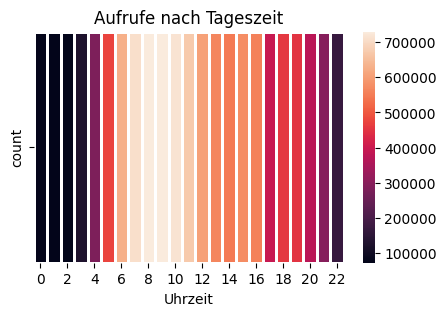

In [44]:
# Wochentag und Tageszeit einlesen
access_log['weekday'] = access_log['time'].dt.weekday
access_log['daytime'] = access_log['time'].dt.hour

daytime_access = access_log.groupby(['daytime']).size().to_frame(name = 'count').reset_index()

fig, ax = plt.subplots(1, 1, figsize = (5, 3))
df_wide = daytime_access.pivot_table(columns='daytime', values='count', aggfunc=lambda x:x)
heatmap = sns.heatmap(df_wide, linewidths=1.0,ax=ax)

ax.set_xlim(0, 23)
ax.set_ylim(0, 1)

heatmap.set_title('Aufrufe nach Tageszeit')
heatmap.set_xlabel('Uhrzeit')


Text(33.22222222222222, 0.5, 'Wochentag')

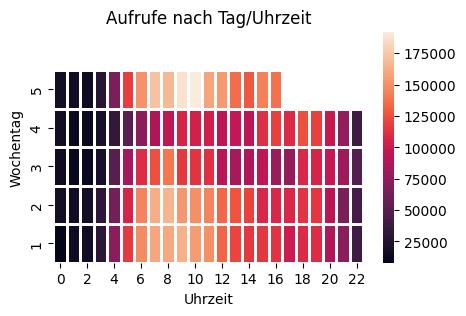

In [45]:
# Wochentag und Tageszeit einlesen
access_log['weekday'] = access_log['time'].dt.weekday
access_log['daytime'] = access_log['time'].dt.hour

daytime_access = access_log.groupby(['weekday', 'daytime']).size().to_frame(name = 'count').reset_index()

fig, ax = plt.subplots(1, 1, figsize = (5, 3))
df_wide = daytime_access.pivot_table(index='weekday',columns='daytime',values='count', aggfunc=lambda x:x)
heatmap = sns.heatmap(df_wide, linewidths=1.0,ax=ax)

ax.set_xlim(0, 23)
ax.set_ylim(0, 6)
# ax.set_yticks(range(0, 7), ['Mo', 'Di', 'Mi', 'Do', 'Fr', 'Sa', 'So'])

heatmap.set_title('Aufrufe nach Tag/Uhrzeit')
heatmap.set_xlabel('Uhrzeit')
heatmap.set_ylabel('Wochentag')

# 1 => Dienstag


# WIP

In [4]:
city_ip4 = pd.read_csv('data/geo-city/GeoLite2-City-Blocks-IPv4.csv')
city_ip4.head()

,network,geoname_id,registered_country_geoname_id,represented_country_geoname_id,is_anonymous_proxy,is_satellite_provider,postal_code,latitude,longitude,accuracy_radius
0,1.0.0.0/24,2157065.0,2077456.0,NaN,0,0,3825,-38.0248,146.3710,1000.0
1,1.0.1.0/24,1814991.0,1814991.0,NaN,0,0,NaN,34.7732,113.7220,1000.0
2,1.0.2.0/23,1814991.0,1814991.0,NaN,0,0,NaN,34.7732,113.7220,1000.0
3,1.0.4.0/22,2147714.0,2077456.0,NaN,0,0,2000,-33.8715,151.2006,1000.0
4,1.0.8.0/21,1814991.0,1814991.0,NaN,0,0,NaN,34.7732,113.7220,1000.0


In [5]:
locations = pd.read_csv('data/geo-city/GeoLite2-City-Locations-de.csv')
locations.head()

,geoname_id,locale_code,continent_code,continent_name,country_iso_code,country_name,subdivision_1_iso_code,subdivision_1_name,subdivision_2_iso_code,subdivision_2_name,city_name,metro_code,time_zone,is_in_european_union
0,1392,de,AS,Asien,IR,Iran,02,Mazandaran,NaN,NaN,NaN,NaN,Asia/Tehran,0
1,7240,de,AS,Asien,IR,Iran,28,Nord-Chorasan,NaN,NaN,NaN,NaN,Asia/Tehran,0
2,10293,de,AS,Asien,IR,Iran,26,NaN,NaN,NaN,NaN,NaN,Asia/Tehran,0
3,10570,de,AS,Asien,IR,Iran,26,NaN,NaN,NaN,NaN,NaN,Asia/Tehran,0
4,11797,de,AS,Asien,IR,Iran,02,Mazandaran,NaN,NaN,NaN,NaN,Asia/Tehran,0


In [4]:
copy = access_log.copy()
copy['ip_n'] = pf.ip_to_int(copy['ip'])
copy.head()

,Unnamed: 0,ip,time,request,status,size,referer,user_agent,ip_n
0,0,54.36.149.41,2019-01-22 03:56:14+03:30,GET /filter/27|13%20%D9%85%DA%AF%D8%A7%D9%BE%D...,200,30577,NaN,Mozilla/5.0 (compatible; AhrefsBot/6.1; +http:...,908367145
1,1,31.56.96.51,2019-01-22 03:56:16+03:30,GET /image/60844/productModel/200x200 HTTP/1.1,200,5667,https://www.zanbil.ir/m/filter/b113,Mozilla/5.0 (Linux; Android 6.0; ALE-L21 Build...,523788339
2,2,31.56.96.51,2019-01-22 03:56:16+03:30,GET /image/61474/productModel/200x200 HTTP/1.1,200,5379,https://www.zanbil.ir/m/filter/b113,Mozilla/5.0 (Linux; Android 6.0; ALE-L21 Build...,523788339
3,3,40.77.167.129,2019-01-22 03:56:17+03:30,GET /image/14925/productModel/100x100 HTTP/1.1,200,1696,NaN,Mozilla/5.0 (compatible; bingbot/2.0; +http://...,676177793
4,4,91.99.72.15,2019-01-22 03:56:17+03:30,GET /product/31893/62100/%D8%B3%D8%B4%D9%88%D8...,200,41483,NaN,Mozilla/5.0 (Windows NT 6.2; Win64; x64; rv:16...,1533233167


In [23]:
#print(city_ip4['network'].map(lambda network: ipcalc.Network(network)))

city_ip4['ip_first'] = pf.ip_to_int(city_ip4['network'].map(lambda network: ipcalc.Network(network)[0]))
city_ip4['ip_last'] = pf.ip_to_int(city_ip4['network'].map(lambda network: ipcalc.Network(network)[-1]))
city_ip4.head()

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [19]:
copy.conditional_join(
    city_ip4,
    ('ip_n', 'ip_first', '>='), 
    ('ip_n', 'ip_last', '<='),
    how='left',
    keep='first'
    ).head()

KeyboardInterrupt: 